# Generalized Linear Models

A simple way to construct a model of our data is to assume that the target, `y`, is a linear combination of the data, `X`. That is to say that we can multiply each feature of `X_i` by some weight `w_i` (and add a constant `b`) to get our original `y`:

$$y = X w + b$$

Since this calculated `y` is sure to be different from our original results, lets call it `h`. To determine how inaccurate the model is, simply subtract each ``h`` from the corresponding correct ``y``; if you square the result, you'll get the absolute error, ignoring the sign. Add this error over all the samples and divide by the number of samples to get the Mean Squared Error:

$$MSE = \frac{1}{n} \sum_{i}^{n} (h_i - y_i)^2 = \frac{1}{n} \sum_{i}^{n} (X_i w + b - y_i)^2$$

The goal of learning our model then becomes minimizing this error by finding the best `w` and `b`.

To see this demonstrated, let's fit a line to a `sin` wave:

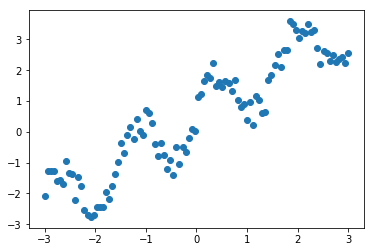

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-3, 3, 100)
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.uniform(size=len(x))
X = x[:, np.newaxis]
plt.scatter(x, y);

In [2]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X, y)
print('Score: {}, w: {}, b: {}'.format(regressor.score(X, y), regressor.coef_, regressor.intercept_))

Score: 0.8144498241178159, w: [0.92661741], b: 0.4701807433782093


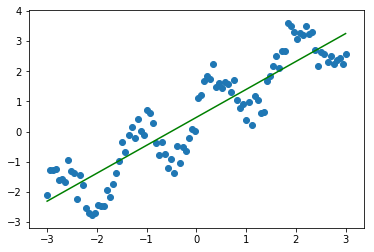

In [3]:
min_pt = X.min() * regressor.coef_[0] + regressor.intercept_
max_pt = X.max() * regressor.coef_[0] + regressor.intercept_

plt.plot([X.min(), X.max()], [min_pt, max_pt], color='g')
plt.scatter(X, y);

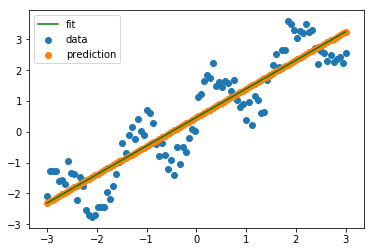

In [4]:
h = regressor.predict(X)
plt.scatter(X, y, label='data')
plt.scatter(X, h, label='prediction')
plt.plot([X.min(), X.max()], [min_pt, max_pt], color='g', label='fit')
plt.legend(loc='best');

This method has been using the 'Ordinary Least squares' method to minimize the MSE:

$$MSE = \frac{1}{n} \sum_{i}^{n} (h_i - y_i)^2 = \frac{1}{n} \sum_{i}^{n} (X_i w + b - y_i)^2$$

Other linear models are available which use different error metrics. One example is ElasticNet:

In [5]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()
elastic.fit(X, y)
print('Least squares: {}, Elastic Net: {}'.format(regressor.score(X, y), elastic.score(X, y)))

Least squares: 0.8144498241178159, Elastic Net: 0.745019924116453


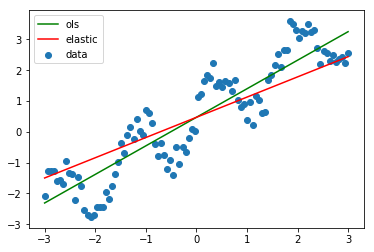

In [6]:
min_pt_e = X.min() * elastic.coef_[0] + elastic.intercept_
max_pt_e = X.max() * elastic.coef_[0] + elastic.intercept_

h = regressor.predict(X)
plt.scatter(X, y, label='data')
plt.plot([X.min(), X.max()], [min_pt, max_pt], color='g', label='ols')
plt.plot([X.min(), X.max()], [min_pt_e, max_pt_e], color='r', label='elastic')
plt.legend(loc='best');

<div class="alert alert-success">
    <b>EXERCISE: Linear regression on the diabetes dataset</b>:
     <ul>
      <li>
      Download ``02_diabetes_linear.py`` from the course website. Change the feature that linear regression is used on and see if any feature can be accurately described using linear regression.
      </li>
    </ul>
</div>

In [7]:
#%load exercises/02_diabetes_linear.py

## Classification

By drawing lines which splits the dataset, we can use this method for classification. However, we use a function, called a logistic function, to better separate the classes. This is therefore known as "logistic regression", which, despite its name, is a classification method. Here, we'll look at a method called "One-vs-Rest logistic regression" where a line is fit for each class.

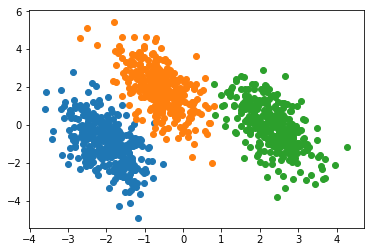

In [8]:
from sklearn.datasets import make_blobs

# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

for i in range(len(centers)):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1])

In [9]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs', multi_class='ovr').fit(X, y)
clf.coef_, clf.intercept_

(array([[-4.41502175, -2.23052321],
        [-0.36790997,  1.64019198],
        [ 4.70152578,  0.18083184]]),
 array([-4.60855523, -1.91396218, -4.17029216]))

In [10]:
prediction = clf.predict(X)
clf.score(X, y)

0.976

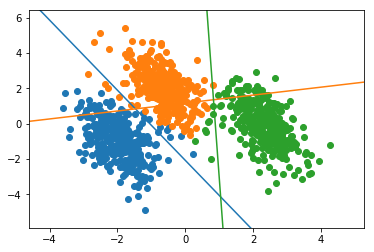

In [11]:
for i in range(len(centers)):
    idx = np.where(prediction == i)
    plt.scatter(X[idx, 0], X[idx, 1])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
def line(c, x0):
    return (-(x0 * clf.coef_[c, 0]) - clf.intercept_[c]) / clf.coef_[c, 1]
    
for c in clf.classes_:
    plt.plot([x_min, x_max], [line(c, x_min), line(c, x_max)])
        
axes = plt.gca()
axes.set_xlim([x_min, x_max])
axes.set_ylim([y_min, y_max])
plt.show()

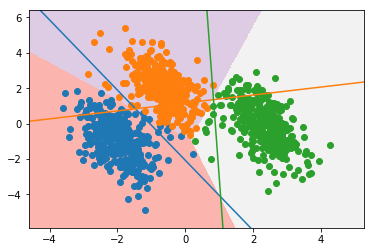

In [12]:
h = .01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)
plt.axis('tight')
for i in range(len(centers)):
    idx = np.where(prediction == i)
    plt.scatter(X[idx, 0], X[idx, 1])
for c in clf.classes_:
    plt.plot([x_min, x_max], [line(c, x_min), line(c, x_max)])